<a href="https://colab.research.google.com/github/krithika1998/disaster_tweet-kaggle/blob/main/Disaster_Tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
nltk.download('punkt')
import re
import string
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from tensorflow.keras.preprocessing.text import Tokenizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
train = pd.read_csv('train.csv')
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
test = pd.read_csv('test.csv')
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


Number of Tweets for each keywords


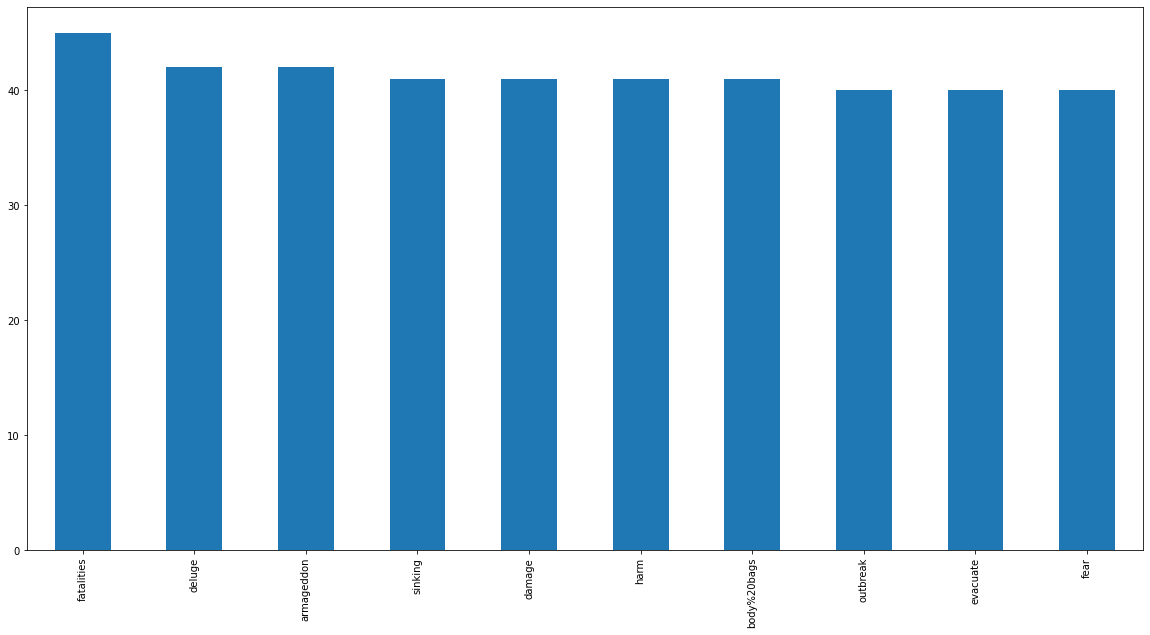

In [ ]:
train['keyword'].value_counts().head(10).plot(kind='bar',figsize= (20,10))

Preprocessing of Train data

In [ ]:
sentence = []
for i in range(len(train['text'])):
    text = train['text'][i].split()
    sentence.append(text)

In [ ]:
import re
sentence_1 = []
for i in sentence:
    temp = []
    for j in i:
      word  = re.sub(r'[0-9]+', '', j)
      temp.append(word)
    sentence_1.append(temp) 

In [ ]:
sentence_new = []
for i in sentence_1: 
  temp1 = []
  for j in i:
    html = re.sub(r'^https?:\/\/.*[\r\n]*', '', j, flags=re.MULTILINE)
    temp1.append(html)
  sentence_new.append(temp1)

In [ ]:
sentence_2 = []
for i in sentence_new: 
  temp1_new = []
  for j in i:
    emoji = re.compile(
        '['
        u'\U0001F600-\U0001F64F'  # emoticons
        u'\U0001F300-\U0001F5FF'  # symbols & pictographs
        u'\U0001F680-\U0001F6FF'  # transport & map symbols
        u'\U0001F1E0-\U0001F1FF'  # flags (iOS)
        u'\U00002702-\U000027B0'
        u'\U000024C2-\U0001F251'
        ']+',
        flags=re.UNICODE)
    emoji_word = emoji.sub(r'', j)
    temp1_new.append(emoji_word)
  sentence_2.append(temp1_new)

In [ ]:
stop_words = set(stopwords.words("english"))

filtered = []
for i in sentence_2:
    temp2 = []
    for j in i:
        if j not in stop_words:
          temp2.append(j)
    filtered.append(temp2)

In [ ]:
import string
regex = re.compile('[%s]' % re.escape(string.punctuation))

filtered_2 = []
for i in filtered:
  temp3 = []
  for j in i:
    new_token = regex.sub(u'', j)
    if not new_token == u'':
            temp3.append(new_token)
  filtered_2.append(temp3)

In [ ]:
porter = PorterStemmer()
snowball = SnowballStemmer('english')
wordnet = WordNetLemmatizer()

filtered_3 = []
for i in filtered_2:
    temp4 = []
    for j in i:
        temp4.append(porter.stem(j))
    filtered_3.append(' '.join(temp4))

In [ ]:
train['filtered'] = filtered_3

In [ ]:
import nltk
nltk.download('all')
nltk.download('wordnet')

In [ ]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

# Define a word lemmatizer function
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

# Apply the word lemmatizer function to data
train['filtered'] = train['filtered'].apply(lemmatize_text)

In [ ]:
train

,id,keyword,location,text,target,filtered
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,"[our, deed, reason, earthquak, may, allah, for..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,"[forest, fire, near, la, rong, sask, canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,"[all, resid, ask, shelter, place, notifi, offi..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"[peopl, receiv, wildfir, evacu, order, califor..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,"[just, got, sent, photo, rubi, alaska, smoke, ..."
...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,"[two, giant, crane, hold, bridg, collaps, near..."
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,"[ariaahrari, thetawniest, the, control, wild, ..."
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,"[m, utckm, s, volcano, hawaii]"
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,"[polic, investig, ebik, collid, car, littl, po..."


Preprocessing Text data

In [ ]:
sentence = []
for i in range(len(test['text'])):
    text = test['text'][i].split()
    sentence.append(text)

In [ ]:
import re
sentence_1 = []
for i in sentence:
    temp = []
    for j in i:
      word  = re.sub(r'[0-9]+', '', j)
      temp.append(word)
    sentence_1.append(temp) 

In [ ]:
sentence_new = []
for i in sentence_1: 
  temp1 = []
  for j in i:
    html = re.sub(r'^https?:\/\/.*[\r\n]*', '', j, flags=re.MULTILINE)
    temp1.append(html)
  sentence_new.append(temp1)

In [ ]:
sentence_2 = []
for i in sentence_new: 
  temp1_new = []
  for j in i:
    emoji = re.compile(
        '['
        u'\U0001F600-\U0001F64F'  # emoticons
        u'\U0001F300-\U0001F5FF'  # symbols & pictographs
        u'\U0001F680-\U0001F6FF'  # transport & map symbols
        u'\U0001F1E0-\U0001F1FF'  # flags (iOS)
        u'\U00002702-\U000027B0'
        u'\U000024C2-\U0001F251'
        ']+',
        flags=re.UNICODE)
    emoji_word = emoji.sub(r'', j)
    temp1_new.append(emoji_word)
  sentence_2.append(temp1_new)

In [ ]:
stop_words = set(stopwords.words("english"))

filtered = []
for i in sentence_2:
    temp2 = []
    for j in i:
        if j not in stop_words:
          temp2.append(j)
    filtered.append(temp2)

In [ ]:
import string
regex = re.compile('[%s]' % re.escape(string.punctuation))

filtered_2 = []
for i in filtered:
  temp3 = []
  for j in i:
    new_token = regex.sub(u'', j)
    if not new_token == u'':
            temp3.append(new_token)
  filtered_2.append(temp3)

In [ ]:
porter = PorterStemmer()
snowball = SnowballStemmer('english')
wordnet = WordNetLemmatizer()

filtered_3 = []
for i in filtered_2:
    temp4 = []
    for j in i:
        temp4.append(porter.stem(j))
    filtered_3.append(' '.join(temp4))

In [ ]:
test['filtered'] = filtered_3

In [ ]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

# Define a word lemmatizer function
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

# Apply the word lemmatizer function to data
test['filtered'] = test['filtered'].apply(lemmatize_text)

In [ ]:
test

,id,keyword,location,text,filtered
0,0,NaN,NaN,Just happened a terrible car crash,"[just, happen, terribl, car, crash]"
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...","[heard, earthquak, differ, citi, stay, safe, e..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...","[forest, fire, spot, pond, gee, flee, across, ..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,"[apocalyps, light, spokan, wildfir]"
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,"[typhoon, soudelor, kill, china, taiwan]"
...,...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,"[earthquak, safeti, lo, angel, ûò, safeti, fa..."
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...,"[storm, ri, wors, last, hurrican, my, cityampo..."
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...,"[green, line, derail, chicago]"
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,"[meg, issu, hazard, weather, outlook, hwo]"


Training of model

In [ ]:
train_df = train.drop(['id','keyword','location','text'], axis=1)
train_df

,target,filtered
0,1,"[our, deed, reason, earthquak, may, allah, for..."
1,1,"[forest, fire, near, la, rong, sask, canada]"
2,1,"[all, resid, ask, shelter, place, notifi, offi..."
3,1,"[peopl, receiv, wildfir, evacu, order, califor..."
4,1,"[just, got, sent, photo, rubi, alaska, smoke, ..."
...,...,...
7608,1,"[two, giant, crane, hold, bridg, collaps, near..."
7609,1,"[ariaahrari, thetawniest, the, control, wild, ..."
7610,1,"[m, utckm, s, volcano, hawaii]"
7611,1,"[polic, investig, ebik, collid, car, littl, po..."


In [ ]:
y = train_df.drop(['filtered'], axis=1)
y

,target
0,1
1,1
2,1
3,1
4,1
...,...
7608,1
7609,1
7610,1
7611,1


In [ ]:
test_df = test.drop(['id','keyword','location','text'], axis=1)
test_df

,filtered
0,"[just, happen, terribl, car, crash]"
1,"[heard, earthquak, differ, citi, stay, safe, e..."
2,"[forest, fire, spot, pond, gee, flee, across, ..."
3,"[apocalyps, light, spokan, wildfir]"
4,"[typhoon, soudelor, kill, china, taiwan]"
...,...
3258,"[earthquak, safeti, lo, angel, ûò, safeti, fa..."
3259,"[storm, ri, wors, last, hurrican, my, cityampo..."
3260,"[green, line, derail, chicago]"
3261,"[meg, issu, hazard, weather, outlook, hwo]"


In [ ]:
from keras.preprocessing.text import Tokenizer
texts = train_df['filtered'].values
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
X = tokenizer.texts_to_sequences(texts)


In [ ]:
from keras.preprocessing.text import Tokenizer
texts = test_df['filtered'].values
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
X_test = tokenizer.texts_to_sequences(texts)

In [ ]:
vocab_size = 20000
embedding_dim = 32
max_length = 200
trunc_type='post'
padding_type='post'


In [ ]:
from keras.preprocessing.sequence import pad_sequences
X_padded = pad_sequences(X,maxlen=max_length, truncating=trunc_type, padding=padding_type)
X_test_padded = pad_sequences(X_test,maxlen=max_length, truncating=trunc_type, padding=padding_type)

In [ ]:
import numpy as np
X_padded = np.array(X_padded)
X_test_padded = np.array(X_test_padded)
y = np.array(y)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, Flatten, Bidirectional

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length = max_length))
#model.add(SpatialDropout1D(0.4))
model.add(Bidirectional(LSTM(64, dropout=0.5)))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
model.add(Flatten())
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 200, 32)           640000    
                                                                 
 bidirectional_3 (Bidirectio  (None, 128)              49664     
 nal)                                                            
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
 flatten_3 (Flatten)         (None, 1)                 0         
                                                                 
Total params: 689,793
Trainable params: 689,793
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
batch_size=64
model_fit = model.fit(X_padded, y, epochs = 50, batch_size=batch_size, validation_split=0.2)

Epoch 1/50
96/96 [==============================] - 34s 317ms/step - loss: 0.6428 - accuracy: 0.6297 - val_loss: 0.5163 - val_accuracy: 0.7544
Epoch 2/50
96/96 [==============================] - 27s 280ms/step - loss: 0.4242 - accuracy: 0.8268 - val_loss: 0.4647 - val_accuracy: 0.7892
Epoch 3/50
96/96 [==============================] - 28s 287ms/step - loss: 0.3095 - accuracy: 0.8760 - val_loss: 0.4672 - val_accuracy: 0.7853
Epoch 4/50
96/96 [==============================] - 27s 279ms/step - loss: 0.2348 - accuracy: 0.9100 - val_loss: 0.5208 - val_accuracy: 0.7853
Epoch 5/50
96/96 [==============================] - 27s 280ms/step - loss: 0.1872 - accuracy: 0.9279 - val_loss: 0.5670 - val_accuracy: 0.7571
Epoch 6/50
96/96 [==============================] - 29s 304ms/step - loss: 0.1431 - accuracy: 0.9479 - val_loss: 0.6431 - val_accuracy: 0.7393
Epoch 7/50
96/96 [==============================] - 29s 307ms/step - loss: 0.1196 - accuracy: 0.9583 - val_loss: 0.6701 - val_accuracy: 0.7341

In [ ]:
test_predict = model.predict(X_test_padded).round().astype(int)

In [ ]:
test_predict

array([[1],
       [1],
       [0],
       ...,
       [1],
       [0],
       [0]])

Create Submission File

In [ ]:
submission = test[['id']].copy()
submission['target'] = test_predict
submission.to_csv('submission.csv', sep='\t', encoding='utf-8')

Accuracy and Loss graph

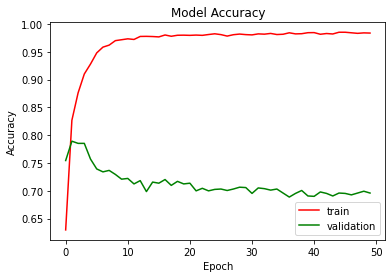

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(model_fit.history["accuracy"], color="r")
plt.plot(model_fit.history["val_accuracy"], color="g")
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'])
plt.show()

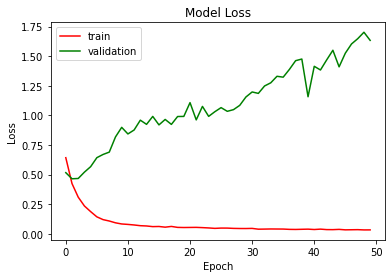

In [ ]:
plt.plot(model_fit.history["loss"], color="r")
plt.plot(model_fit.history["val_loss"], color="g")
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'])
plt.show()

WordCloud

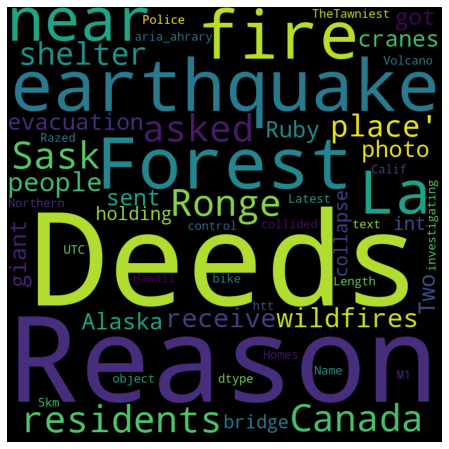

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 800, background_color = 'black', stopwords = stop_words, max_words = 1000
                    , min_font_size = 20).generate(str(train['text']))

#plot the word cloud
fig = plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

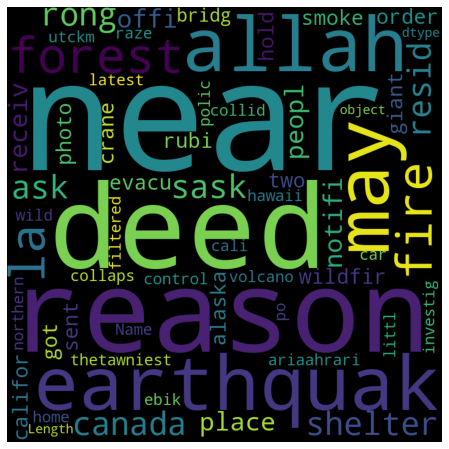

In [ ]:
wordcloud_filtered = WordCloud(width = 800, height = 800, background_color = 'black', stopwords = stop_words, max_words = 1000
                    , min_font_size = 20).generate(str(train['filtered']))

#plot the word cloud
fig = plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud_filtered)
plt.axis('off')
plt.show()

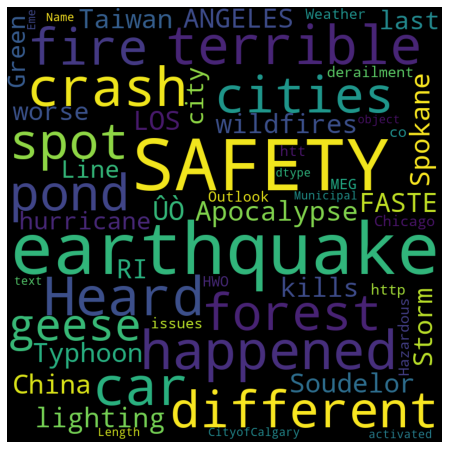

In [ ]:
wordcloud = WordCloud(width = 800, height = 800, background_color = 'black', stopwords = stop_words, max_words = 1000
                    , min_font_size = 20).generate(str(test['text']))

#plot the word cloud
fig = plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Polarity

In [ ]:
from textblob import TextBlob
train['polarity'] = train['text'].map(lambda text: TextBlob(text).sentiment.polarity)

In [ ]:
sentiment_scores_tb = [round(TextBlob(article).sentiment.polarity, 3) for article in train['text']]

sentiment_category_tb = ['positive' if score > 0 
                             else 'negative' if score < 0 
                                 else 'neutral' 
                                     for score in sentiment_scores_tb]

In [ ]:
train_sentiment = pd.DataFrame([list(train['keyword']), sentiment_scores_tb, sentiment_category_tb]).T
train_sentiment.columns = ['keyword', 'sentiment_score', 'sentiment_category']
train_sentiment['sentiment_score'] = train_sentiment.sentiment_score.astype('float')
train_sentiment.groupby(by=['keyword']).describe()

sentiment_score                                          \
                              count      mean       std    min     25%  50%   
keyword                                                                       
ablaze                         36.0  0.089278  0.293568 -0.400  0.0000  0.0   
accident                       35.0 -0.005600  0.177147 -0.667  0.0000  0.0   
aftershock                     34.0  0.068971  0.251855 -0.567  0.0000  0.0   
airplane%20accident            35.0 -0.202229  0.450055 -1.000 -0.2000  0.0   
ambulance                      38.0 -0.065658  0.246830 -0.800 -0.2000  0.0   
...                             ...       ...       ...    ...     ...  ...   
wounded                        37.0 -0.011568  0.281894 -0.250 -0.2000 -0.2   
wounds                         33.0  0.068152  0.217928 -0.600  0.0000  0.0   
wreck                          37.0  0.066784  0.272162 -0.625  0.0000  0.0   
wreckage                       39.0  0.273436  0.171751 -0.100  0.1085  0.4   
wrecked                        39.0  0.157051  0.312714 -0.700  0.0000  0.0   

                                     
                         75%    max  
keyword                              
ablaze               0.00000  1.000  
accident             0.00000  0.350  
aftershock           0.05325  1.000  
airplane%20accident  0.00000  0.688  
ambulance            0.00000  0.688  
...                      ...    ...  
wounded              0.05000  0.875  
wounds               0.12500  0.625  
wreck                0.14300  0.750  
wreckage             0.40000  0.400  
wrecked              0.32500  0.800  

[221 rows x 8 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


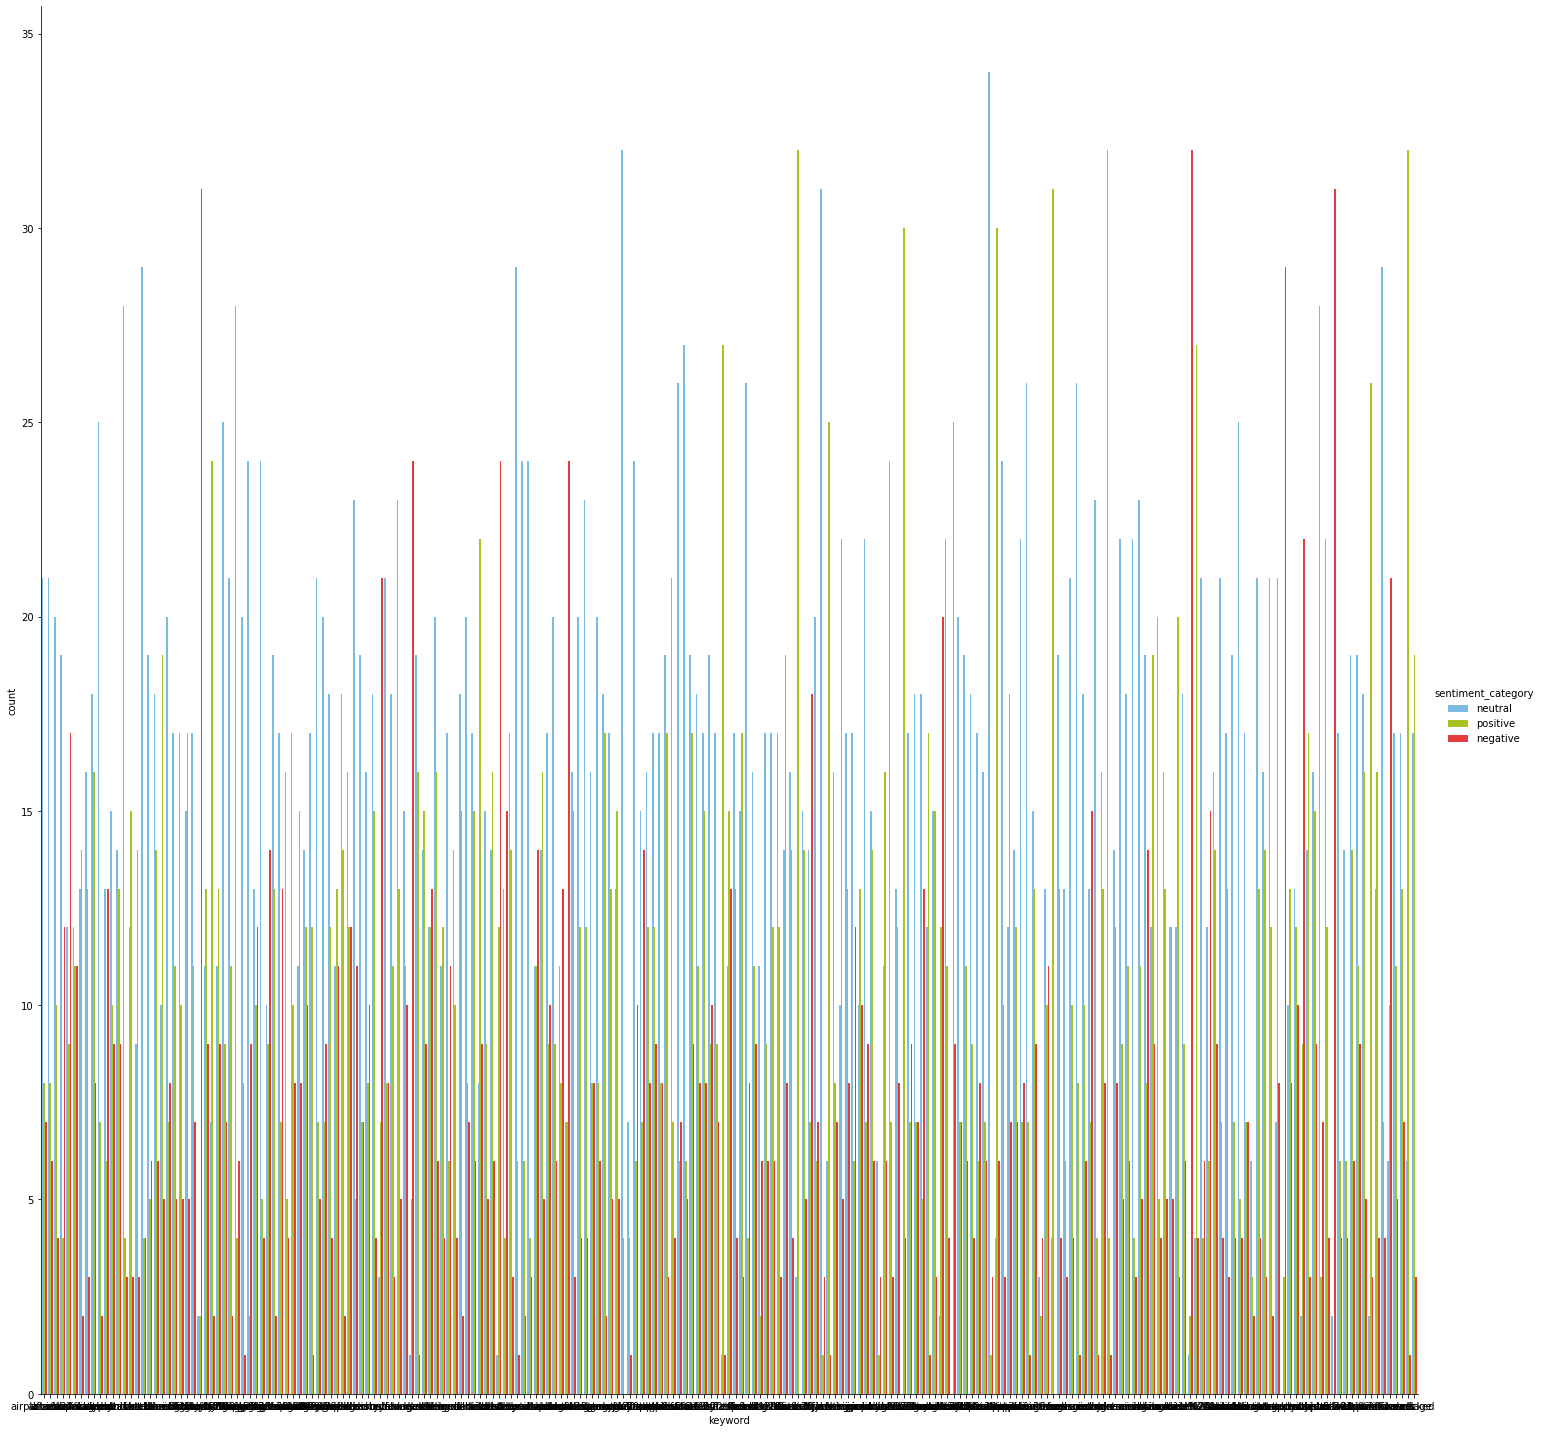

In [ ]:
import seaborn as sns

sns.factorplot(x="keyword", hue="sentiment_category", 
                    data=train_sentiment, kind="count", 
                    palette={"negative": "#FE2020", 
                             "positive": "#BADD07", 
                             "neutral": "#68BFF5"}, size = 20)


TF IDF

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cvec = CountVectorizer(min_df=.005, max_df=.9, ngram_range=(1,2), tokenizer=lambda doc: doc, lowercase=False)
cvec.fit(train['filtered'])

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


CountVectorizer(lowercase=False, max_df=0.9, min_df=0.005, ngram_range=(1, 2),
                tokenizer=<function <lambda> at 0x7f73656bc5f0>)

In [ ]:
cvec_counts = cvec.transform(train['filtered'])
print('sparse matrix shape:', cvec_counts.shape)
print('nonzero count:', cvec_counts.nnz)
print('sparsity: %.2f%%' % (100.0 * cvec_counts.nnz / (cvec_counts.shape[0] * cvec_counts.shape[1])))

sparse matrix shape: (7613, 383)
nonzero count: 31073
sparsity: 1.07%


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(cvec_counts)
transformed_weights

<7613x383 sparse matrix of type '<class 'numpy.float64'>'
	with 31073 stored elements in Compressed Sparse Row format>

In [ ]:
transformed_weights = transformed_weights.toarray()
vocab = cvec.get_feature_names()
tfidf = pd.DataFrame(transformed_weights, columns=vocab)
tfidf['Keyword'] = tfidf.idxmax(axis=1)
tfidf['Max'] = tfidf.max(axis=1)
tfidf['Sum'] = tfidf.drop('Max', axis=1).sum(axis=1)
tfidf.head(10)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


,a,accid,affect,after,air,all,also,alway,ambul,amp,...,you,your,youtub,youtub video,yr,û,ûò,Keyword,Max,Sum
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,earthquak,0.650289,1.719628
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,near,0.639392,1.712243
2,0.0,0.0,0.0,0.0,0.0,0.496849,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,offic,0.546554,1.995491
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,wildfir,0.539376,1.996478
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,smoke,0.428909,2.447456
5,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,updat,0.567009,1.983880
6,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,flood,0.656614,2.160307
7,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,top,0.573023,2.185229
8,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,happen,0.505213,2.230312
9,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,area,0.674568,1.714995


In [ ]:
train_1 = train.drop(['id', 'keyword','polarity','location'], axis=1)
tfidf_new = pd.merge(train_1, tfidf, left_index=True, right_index=True)
tfidf_new

,text,target,filtered,a,accid,affect,after,air,all,also,...,you,your,youtub,youtub video,yr,û,ûò,Keyword,Max,Sum
0,Our Deeds are the Reason of this #earthquake M...,1,"[our, deed, reason, earthquak, may, allah, for...",0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,earthquak,0.650289,1.719628
1,Forest fire near La Ronge Sask. Canada,1,"[forest, fire, near, la, rong, sask, canada]",0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,near,0.639392,1.712243
2,All residents asked to 'shelter in place' are ...,1,"[all, resid, ask, shelter, place, notifi, offi...",0.0,0.0,0.0,0.0,0.0,0.496849,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,offic,0.546554,1.995491
3,"13,000 people receive #wildfires evacuation or...",1,"[peopl, receiv, wildfir, evacu, order, califor...",0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,wildfir,0.539376,1.996478
4,Just got sent this photo from Ruby #Alaska as ...,1,"[just, got, sent, photo, rubi, alaska, smoke, ...",0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,smoke,0.428909,2.447456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,Two giant cranes holding a bridge collapse int...,1,"[two, giant, crane, hold, bridg, collaps, near...",0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,bridg,0.566419,1.993275
7609,@aria_ahrary @TheTawniest The out of control w...,1,"[ariaahrari, thetawniest, the, control, wild, ...",0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,part,0.412188,2.787139
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,"[m, utckm, s, volcano, hawaii]",0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,m,0.722647,1.413864
7611,Police investigating after an e-bike collided ...,1,"[polic, investig, ebik, collid, car, littl, po...",0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,littl,0.443673,2.445135
